# Demonstration 1

## Solution Notebook

To simulate the 1D diffusion using random walks, we start as follows:

1. We define the number of random walkers.
2. We place these walkers in locations that are defined by the initial condition.

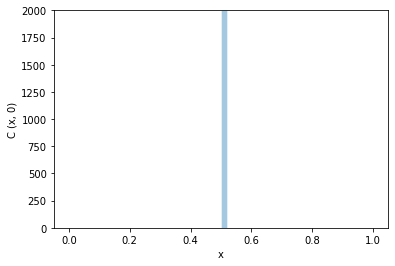

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from IPython import display
import pylab as pl
import random 
import matplotlib.pylab as pl


# Setup of problem parameters:
N = 2000          # number of random walkers per group
L = 1             # length of the domain
Nbins = 50        # number of bins in domain
dbin = 0.1*L/Nbins    # width of each bin
tend = 1000        # end time


# Arrays holding the positions of the random walkers
x = np.empty(N)  # positions of walkers in Group 1


# Apply Initial Conditions (i.e. the initial location of each walker).
# Walkers are all placed in the middle of the domain:
for i in range(0,N):
  x[i] = 0.5*L


# Plot Initial Condition
plt.hist(x, bins=Nbins, range=(0,L), edgecolor="w", alpha=0.4)
plt.ylabel("C (x, 0)")
plt.xlabel("x")
plt.ylim(0, N)
plt.show()

## Evolution in time

3. Create a loop that loops through time. For this, we loop through all the walkers and move them left or right, with equal probability.
4. Apply the Boundary Conditions to model an open space (i.e. walkers leave the system freely. This is also called an "Absorbing Boundary Condition").
5. Plot the results, and observe the histogram of the walker positions evolving in time.

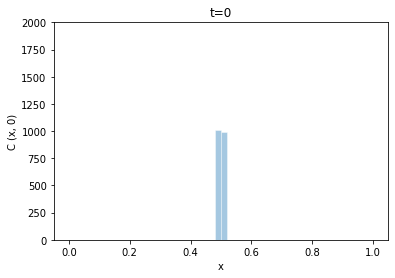

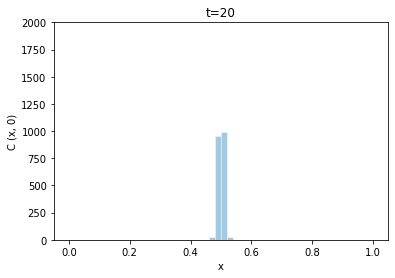

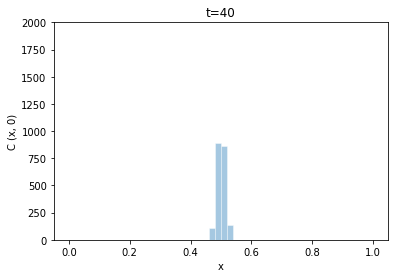

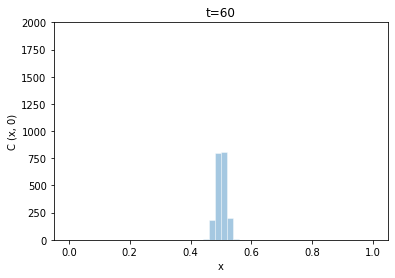

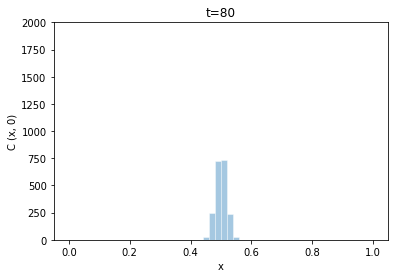

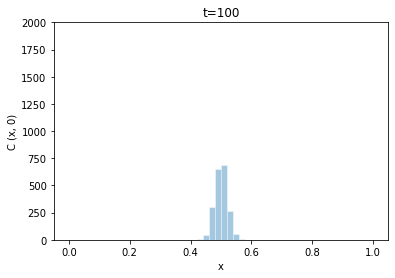

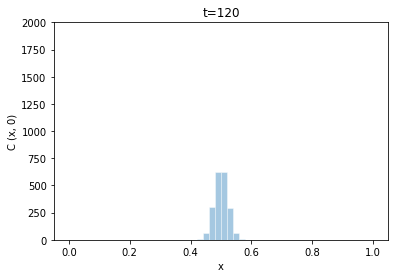

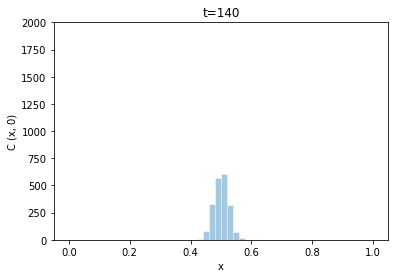

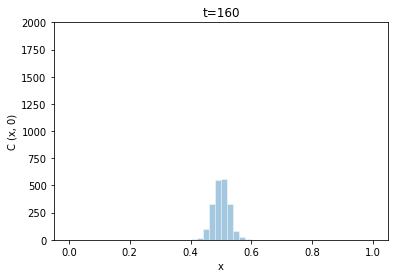

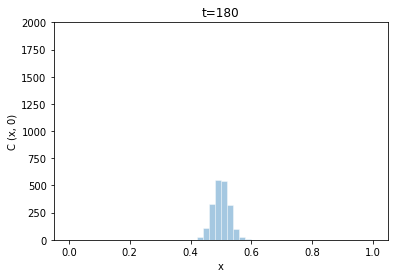

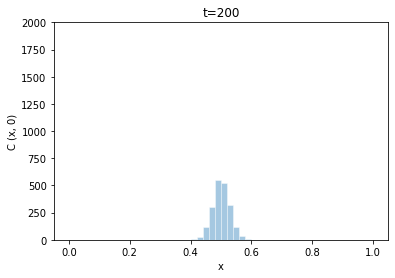

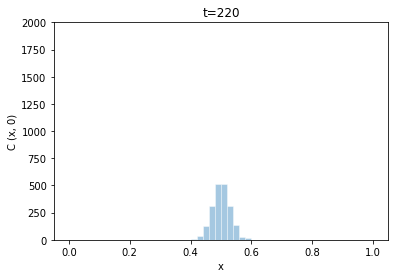

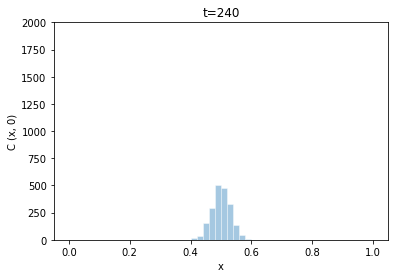

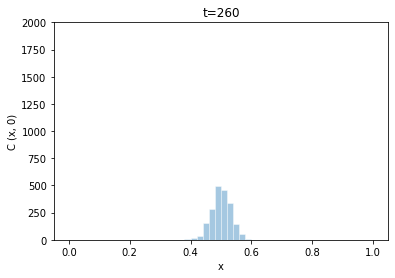

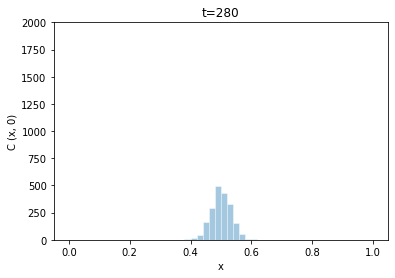

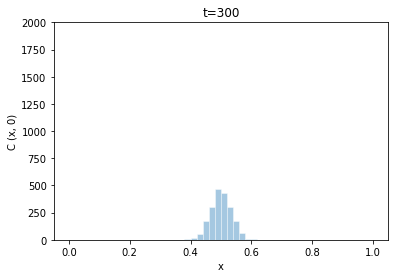

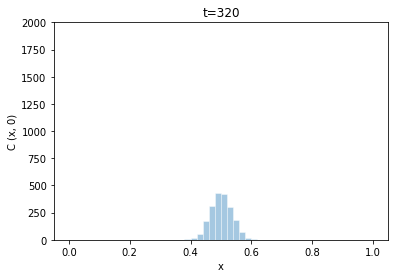

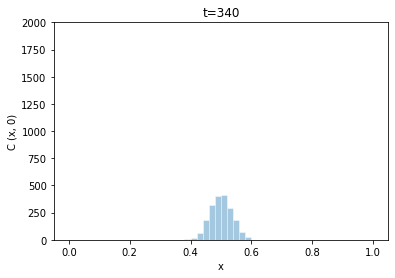

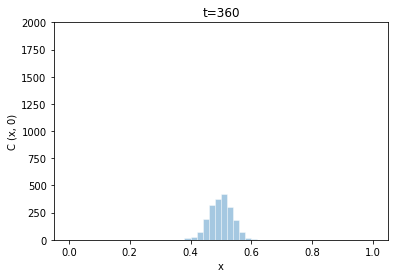

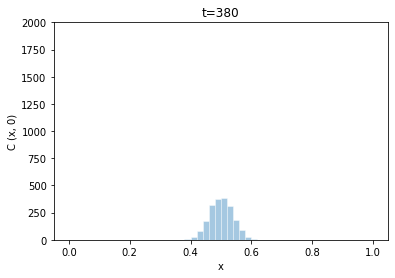

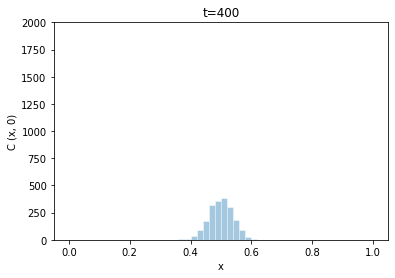

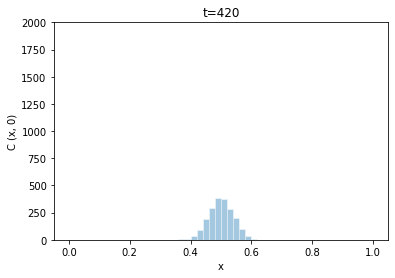

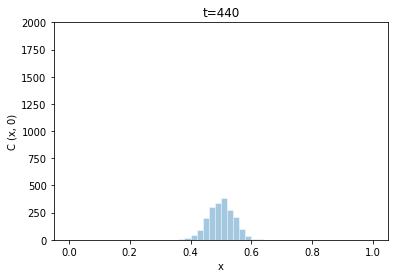

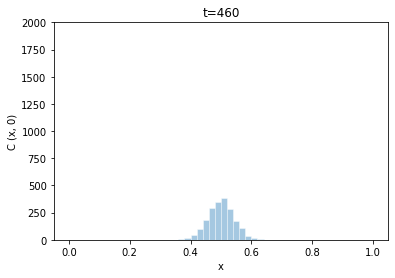

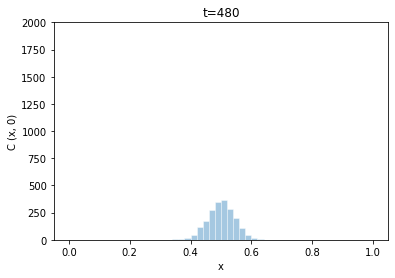

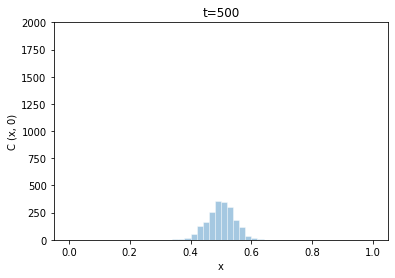

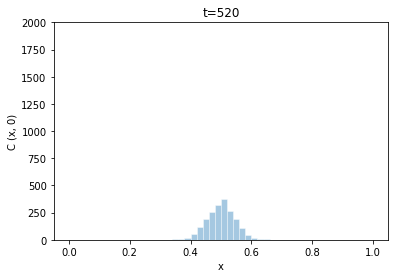

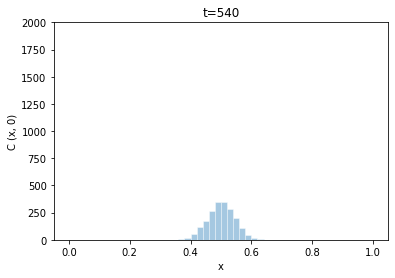

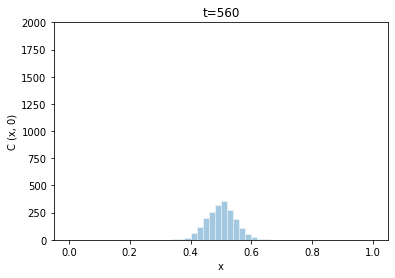

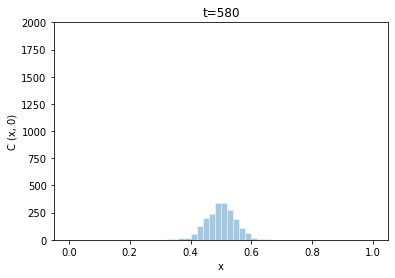

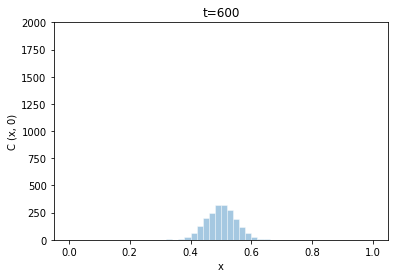

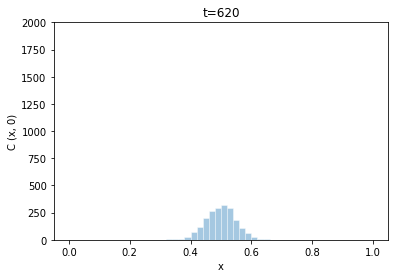

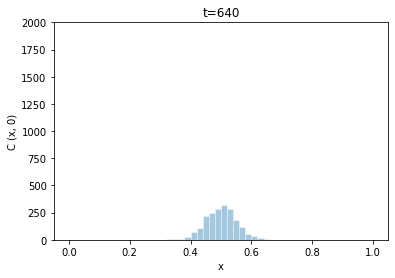

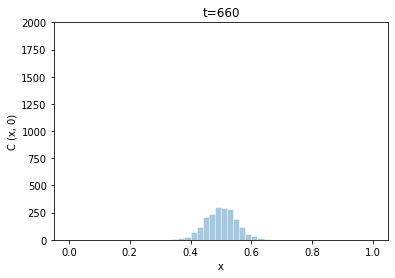

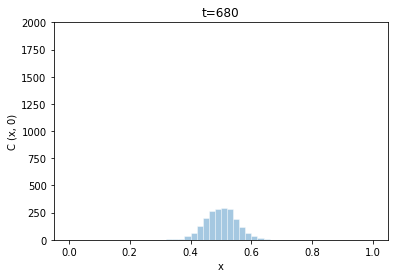

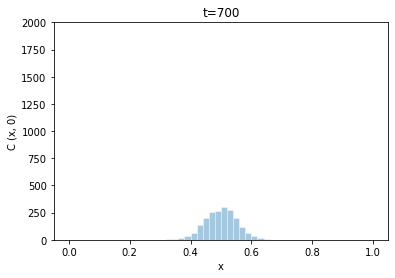

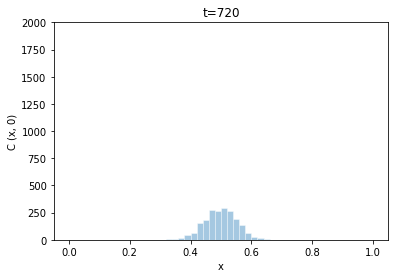

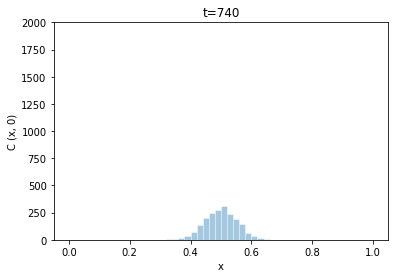

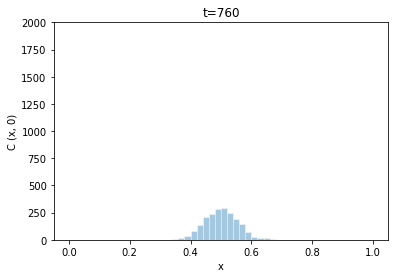

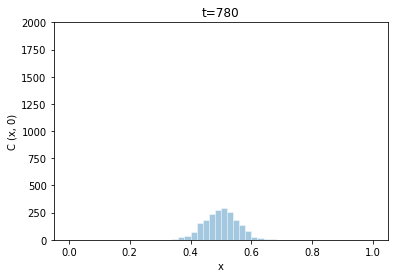

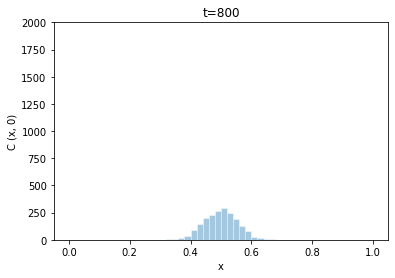

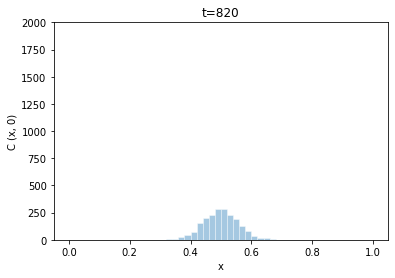

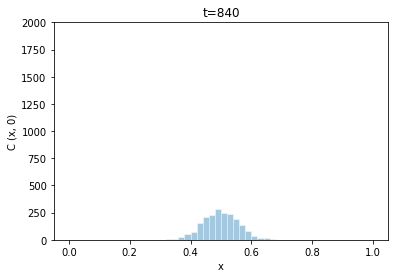

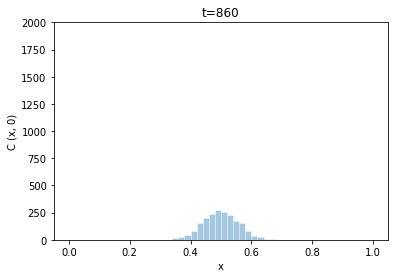

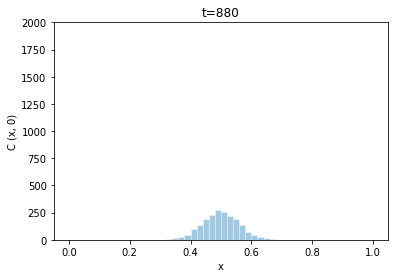

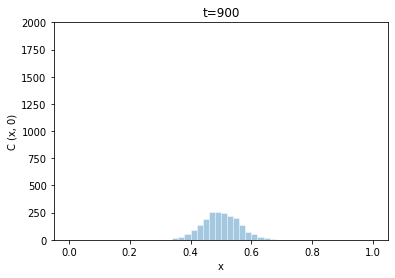

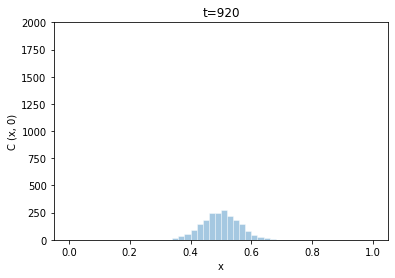

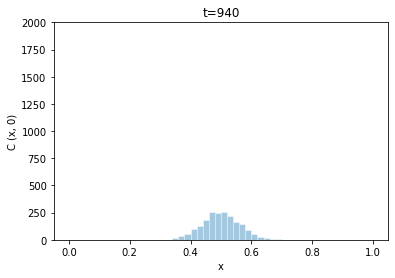

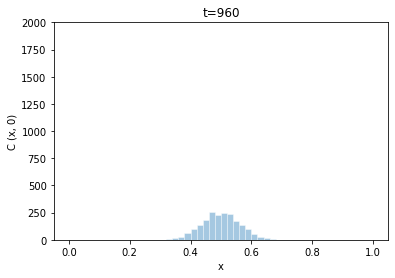

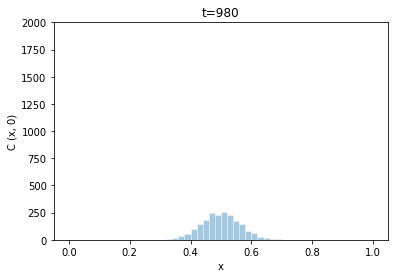

In [2]:
# Evolution of random walks

# Loop over time
for t in range(tend):

  # Loop over particles
  for i in range(N):

    # Update particle positions:
    # (a) draw a random number, r, from a uniform distribution, U(0,1)
    # (b) If r<=0.5 go left. If r>0.5 go right
    r = np.random.uniform(low=0, high=1)
    if r<=0.5:
      x[i] = x[i] + dbin
    else:
      x[i] = x[i] - dbin

    # Boundary condition: absorbing walls
    #   Nothing to do here, we can just restrict the plot limits
    #   below to the orgiginal space [0,L]

  # Plot intermediate concentrations
  if (t%20) == 0:
    plt.hist(x, bins=Nbins, range=(0,L), edgecolor="w", alpha=0.4)
    plt.ylabel("C (x, 0)")
    plt.xlabel("x")
    plt.title("t=%g"%t)
    plt.ylim(0, N)
    plt.show()

## Fit of final distribution with a Gaussian

We compare the distribution of the random walkers with the shape of a Gaussian probability density function (pdf).

To do this, we use the function `norm.pdf(...)` to fit the x-positions of the random walkers at the final timestep, with a Gaussian (otherwise called "Normal") pdf.

We then plot together, the histogram of the x-positions of the random walkers, and the Gaussian pdf fit.

mean=0.50 std=0.0633


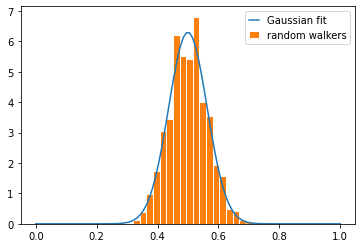

In [3]:
# Fit of last distribution of random walkers, with Gaussian distribution.
# From this we obtain a `mean' and a standard deviation (`std').
mean, std = norm.fit(x)
print("mean=%.2f"%mean, "std=%.4f"%std)

# Plot the Gaussian pdf with mean and std as obtained above
xg = np.linspace(0, L, 100)
yg = norm.pdf(xg, mean, std)
plt.plot(xg, yg, label="Gaussian fit")

# Plot a histogram of the walkers x-positions
plt.hist(x, bins=20, density=True, edgecolor="w", label="random walkers")
plt.legend(handlelength=1)
plt.show()